### - Sobhan Moradian Daghigh
#### - 5/7/2022
#### - DIP - HW02 - Q4

In [1]:
import numpy as np
from PIL import Image
import cv2
from IPython.display import display
from matplotlib import pyplot as plt
import glob

In [2]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)      
        names.append(image.split('\\')[1][:-4])
    return datas, names

In [3]:
images, names = load_datas('./inputs/P4/')
names

['putin', 'putin_mask', 'zelensky', 'zelensky_mask']

In [4]:
def get_neighbours(pixel, window):
    neighbours = [] 
    margin = window // 2
    for i in range(pixel[0] - margin, pixel[0] + margin + 1):
        for j in range(pixel[1] - margin, pixel[1] + margin + 1):
            neighbours.append((i, j))
    return neighbours

In [5]:
def zero_paddig(img, margin):
    pad = np.zeros(np.add(img.shape, (2 * margin, 2 * margin, 0)))
    pad[margin:-margin, margin:-margin] = img
    return pad

In [6]:
def bilateral_filter(img, window, sigma_r, sigma_d):
    margin = window // 2
    pad = zero_paddig(img, margin)
    filterd = np.zeros(img.shape).astype(np.uint8)
    
    for i in range(margin, pad.shape[0] - margin):
        for j in range(margin, pad.shape[1] - margin):
            w_sum = 0
            pixel_sum = 0
            neighbours = get_neighbours((i, j), window=window)
            for neighbour in neighbours:
                w = np.exp(np.subtract(- np.divide(np.add(np.power(i - neighbour[0], 2), np.power(j - neighbour[1], 2)), 2 * np.power(sigma_d, 2)), np.divide(np.power(pad[i, j] - pad[neighbour], 2), 2 * np.power(sigma_r, 2))))
                w_sum += w
                pixel_sum += np.multiply(pad[neighbour], w)
                
            filterd[i - margin, j - margin] = np.divide(pixel_sum, w_sum)
    
    return filterd

In [7]:
def get_masked(img, mask):
    res = cv2.bitwise_and(img, mask)
    return res

In [9]:
img = get_masked(images[0], images[1])
filterd = bilateral_filter(img, 5, 12, 16)

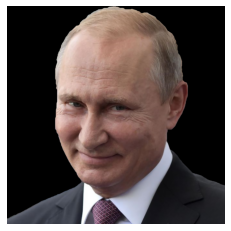

In [10]:
plt.imshow(filterd)
plt.axis('off')
plt.show()